In [1]:
# PyGAD - Python Genetic Algorithm
# source : https://pygad.readthedocs.io/en/latest/index.html
# installation : cmd >> pip3 install pygad
import pygad
import numpy

In [20]:
# y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6 
# where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44

In [2]:
function_inputs = [4,-2,3.5,5,-11,-4.7]
desired_output = 44

def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

fitness_function = fitness_func

num_generations = 50
num_parents_mating = 4

sol_per_pop = 8
num_genes = len(function_inputs)

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

In [25]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Parameters of the best solution : [-0.82255553  1.24813302  4.39614836  4.47488478 -0.89275498 -0.4629566 ]
Fitness value of the best solution = 34.078221176379074
Predicted output based on the best solution : 43.97065574535642


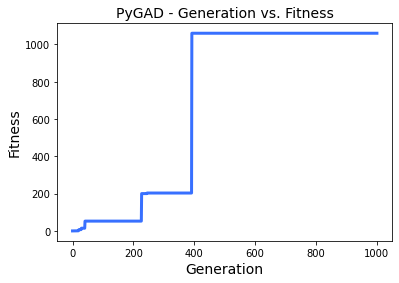

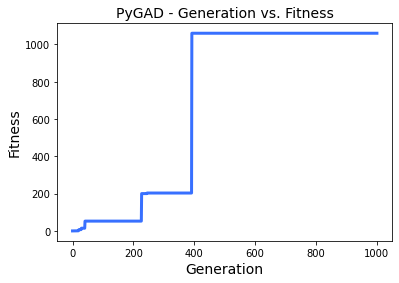

In [28]:
import pygad
import numpy

equation_inputs = [4,-2,3.5]
desired_output = 44

def fitness_func(solution, solution_idx):
    output = numpy.sum(solution * equation_inputs)

    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)

    return fitness

def parent_selection_func(fitness, num_parents, ga_instance):

    fitness_sorted = sorted(range(len(fitness)), key=lambda k: fitness[k])
    fitness_sorted.reverse()

    parents = numpy.empty((num_parents, ga_instance.population.shape[1]))

    for parent_num in range(num_parents):
        parents[parent_num, :] = ga_instance.population[fitness_sorted[parent_num], :].copy()

    return parents, fitness_sorted[:num_parents]

def crossover_func(parents, offspring_size, ga_instance):

    offspring = []
    idx = 0
    while len(offspring) != offspring_size[0]:
        parent1 = parents[idx % parents.shape[0], :].copy()
        parent2 = parents[(idx + 1) % parents.shape[0], :].copy()

        random_split_point = numpy.random.choice(range(offspring_size[0]))

        parent1[random_split_point:] = parent2[random_split_point:]

        offspring.append(parent1)

        idx += 1

    return numpy.array(offspring)

def mutation_func(offspring, ga_instance):

    for chromosome_idx in range(offspring.shape[0]):
        random_gene_idx = numpy.random.choice(range(offspring.shape[0]))

        offspring[chromosome_idx, random_gene_idx] += numpy.random.random()

    return offspring

ga_instance = pygad.GA(num_generations=1000,
                       sol_per_pop=5,
                       num_parents_mating=2,
                       num_genes=len(equation_inputs),
                       fitness_func=fitness_func,
                       crossover_type=crossover_func,
                       mutation_type=mutation_func,
                       parent_selection_type=parent_selection_func)

ga_instance.run()
ga_instance.plot_fitness()

In [30]:
import pygad
import numpy

equation_inputs = [4, -2, 3.5, 8, -2]
desired_output = 2671.1234

def fitness_func(solution, solution_idx):
    output = numpy.sum(solution * equation_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

ga_instance = pygad.GA(num_generations=1000,
                       sol_per_pop=5,
                       num_parents_mating=2,
                       num_genes=len(equation_inputs),
                       fitness_func=fitness_func,
                       gene_type=int)

print("Initial Population")
print(ga_instance.initial_population)

ga_instance.run()

print("Final Population")
print(ga_instance.population)

Initial Population
[[ 0 -3  0  2  2]
 [ 0  3  3 -1  1]
 [-3 -3  3  0 -3]
 [ 1  1  2  0  3]
 [ 3  1 -2  0  2]]
Final Population
[[ 0 -3  3  0 -3]
 [ 0 -3  3  0 -3]
 [ 0 -2  3  0 -3]
 [ 0 -3  3  0 -3]
 [ 0 -3  3  0 -3]]
